Jorge Chavez (jorgejc2) and Diego Del Carpio (ddelca3)

In [14]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
# peak detection functions

def peak_detection(t, sig):
    """
    Description: Retrieve the max peak from a given array of positions and signal values
    :param t:
    :param sig:
    :return:
    """
    peaks = []
    max_val = -np.Inf
    N = len(sig)

    for i in range(0, N):
        if sig[i] > max_val:
            max_val = sig[i]
            position = t[i]
    peaks.append((position, max_val))
    return np.array(peaks)

def multiple_peak_detection(t, sig, thresh=3):
    """
    Description: For every continuous signal above the specified threshold, retrieve its local maxima
    :param t:
    :param sig:
    :param thresh:
    :return:
    """
    peaks = []
    N = len(sig)

    thresh_indices = np.where(sig > thresh)[0] # retrive all sig indices that are above the threshold
    curr_start = thresh_indices[0] # starting slice
    curr_end = None # ending slice
    for i in range(1, len(thresh_indices)):
        idx = thresh_indices[i]

        # update curr_end if indices are still continuous
        if curr_end is None or idx - 1 == curr_end:
            curr_end = idx
            continue

        # if indices are no longer continuous, process previous continuous signal and then reset curr_start and curr_end
        if curr_end is not None and idx - 1 != curr_end:
            peaks.append(peak_detection(t[curr_start:curr_end], sig[curr_start:curr_end])[0])
            curr_start = idx
            curr_end = None

    return np.array(peaks)

shape: (1, 2)


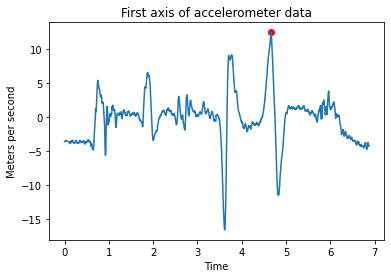

In [16]:
# max peak detection code

csv_filename = 'sample_sensor_data.csv'
data = np.genfromtxt(csv_filename, delimiter=',').T
timestamps = (data[0] - data[0,0]) / 1000

accel_data = data[1:4]
gyro_data = data[4:-1]

# max_peaks = peak_detection(timestamps, accel_data[0])
max_peaks = peak_detection(timestamps, accel_data[0])
print("shape: {}".format(max_peaks.shape))
plt.plot(timestamps, accel_data[0])
plt.scatter(max_peaks[:, 0], max_peaks[:, 1], color='red')
plt.title("First axis of accelerometer data")
plt.xlabel("Time")
plt.ylabel("Meters per second")

plt.show()

shape: (7, 2)


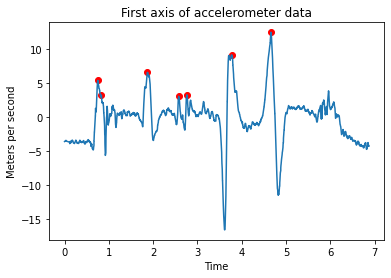

In [17]:
# multiple peak detection code

csv_filename = 'sample_sensor_data.csv'
data = np.genfromtxt(csv_filename, delimiter=',').T
timestamps = (data[0] - data[0,0]) / 1000

accel_data = data[1:4]
gyro_data = data[4:-1]

# max_peaks = peak_detection(timestamps, accel_data[0])
max_peaks = multiple_peak_detection(timestamps, accel_data[0])
print("shape: {}".format(max_peaks.shape))
plt.plot(timestamps, accel_data[0])
plt.scatter(max_peaks[:, 0], max_peaks[:, 1], color='red')
plt.title("First axis of accelerometer data")
plt.xlabel("Time")
plt.ylabel("Meters per second")

plt.show()

## <u>Lab 1 Questions and Answers</u>

### What is the dimension of max_peaks?

Answer: For the single max peak detection part, the dimension is (1, 2). This is because a single max peak is returned as a tuple in terms of its position in time and value.

### What do onResume() and onPause() function do?

Answer: *onResume()* registers the *mSensorReader* so that it can save samples from the accelerator and the gyroscope sensor on the tablet. *onPause()* unregisters the *mSensorReader* so that it no longer collects samples from these sensors. 

### What does timeSinceLastStep do?

Answer: The minimum time between steps is set to 200 ms. I believe that *timeSinceLastStep* is meant to make sure that data can be discarded if its been less than 200 ms since the last step, but it seems there may be a bug in the code since after *timeSinceLastStep* is initialized, it is always greater than 200 ms. 